In [26]:
import torch
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

import pandas as pd
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

In [41]:
num_classes = 10
num_channels = 1
img_x, img_y = 28, 28
input_shape = (img_x, img_y, num_channels)

data = pd.read_csv('data/train.csv')
truth = keras.utils.to_categorical( data.label.as_matrix(), num_classes )
del data['label']
features = data.as_matrix().reshape(len(data), *input_shape)
del data
print truth.shape, features.shape

(42000, 10) (42000, 28, 28, 1)


/home/puser/education/env/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/puser/education/env/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


(<matplotlib.image.AxesImage at 0x7f5833d5acd0>,
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

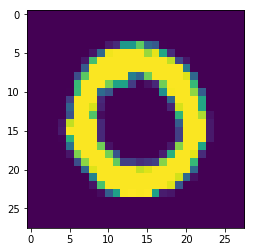

In [42]:
plt.imshow(features[1, :].reshape(28, 28)), truth[1]

In [43]:
# train test split
Ntrain = int(0.95*features.shape[0])
x_train, y_train = features[:Ntrain, :], truth[:Ntrain]
x_test, y_test = features[Ntrain:, :], truth[Ntrain:]

In [44]:
# preprocess data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

('x_train shape:', (39900, 28, 28, 1))
(39900, 'train samples')
(2100, 'test samples')


Train on 39900 samples, validate on 2100 samples
Epoch 1/10
39900/39900 [==============================] - 33s 823us/step - loss: 0.1912 - acc: 0.9415 - val_loss: 0.0771 - val_acc: 0.9757
Epoch 2/10
39900/39900 [==============================] - 35s 876us/step - loss: 0.0497 - acc: 0.9845 - val_loss: 0.0513 - val_acc: 0.9848
Epoch 3/10
39900/39900 [==============================] - 34s 863us/step - loss: 0.0336 - acc: 0.9896 - val_loss: 0.0257 - val_acc: 0.9914
Epoch 4/10
39900/39900 [==============================] - 34s 864us/step - loss: 0.0239 - acc: 0.9922 - val_loss: 0.0275 - val_acc: 0.9914
Epoch 5/10
39900/39900 [==============================] - 35s 865us/step - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 6/10
39900/39900 [==============================] - 35s 874us/step - loss: 0.0131 - acc: 0.9955 - val_loss: 0.0352 - val_acc: 0.9900
Epoch 7/10
39900/39900 [==============================] - 34s 860us/step - loss: 0.0121 - acc: 0.9958 - val_loss: 0.0

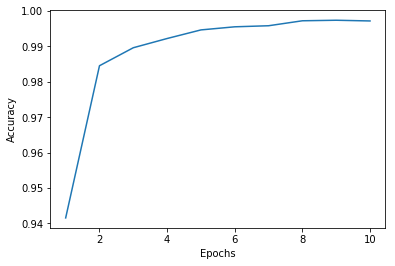

In [34]:
batch_size = 128
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1025000   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total para

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(truth.argmax(axis=1), model.predict(features).argmax(axis=1))

array([[4132,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 4682,    0,    0,    0,    0,    1,    1,    0,    0],
       [   1,    0, 4169,    0,    0,    0,    0,    0,    5,    2],
       [   1,    0,    1, 4345,    0,    0,    0,    0,    3,    1],
       [   0,    1,    0,    0, 4049,    0,    0,    1,    3,   18],
       [   0,    0,    0,    0,    0, 3773,    6,    0,   13,    3],
       [   3,    0,    0,    1,    0,    1, 4132,    0,    0,    0],
       [   2,   15,    1,    0,    0,    0,    0, 4358,    2,   23],
       [   0,    1,    1,    0,    0,    0,    0,    0, 4061,    0],
       [   0,    1,    0,    0,    3,    0,    0,    0,    9, 4175]])

## Make final predictions

In [35]:
data = pd.read_csv('data/test.csv')
features = data.as_matrix().reshape(len(data), *input_shape)
features = features.astype('float32')
features /= 255

/home/puser/education/env/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [36]:
pred = model.predict(features).argmax(axis=1)

4


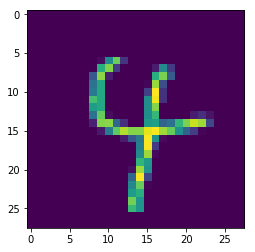

In [40]:
out = open('submission.txt', 'w')
out.write('ImageId,Label\n')
for j, p in enumerate(pred):
    out.write('{},{}\n'.format(j+1,p))

plt.imshow(features[99, :].reshape(28, 28))
print pred[99]